In [70]:
import pandas as pd

In [71]:
df = pd.read_csv("PastLoans.csv")

In [72]:
df.head()

,sex,employment,married,income,digital1,digital2,digital3,default
0,M,unemployed,0,0,0.749267,0.422656,0.738735,0
1,M,employed,1,26108,0.697428,0.596361,0.733947,0
2,M,employed,1,11810,0.000000,0.652496,0.000000,0
3,M,unemployed,1,0,0.000000,0.000000,0.000000,0
4,F,retired,1,6310,0.000000,0.041123,0.203202,0


In [73]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=["sex", "employment"], drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()

,married,income,digital1,digital2,digital3,default,sex_M,employment_retired,employment_student,employment_unemployed
0,0,0,0.749267,0.422656,0.738735,0,True,False,False,True
1,1,26108,0.697428,0.596361,0.733947,0,True,False,False,False
2,1,11810,0.000000,0.652496,0.000000,0,True,False,False,False
3,1,0,0.000000,0.000000,0.000000,0,True,False,False,True
4,1,6310,0.000000,0.041123,0.203202,0,False,True,False,False


In [74]:
df_encoded.head()

,married,income,digital1,digital2,digital3,default,sex_M,employment_retired,employment_student,employment_unemployed
0,0,0,0.749267,0.422656,0.738735,0,True,False,False,True
1,1,26108,0.697428,0.596361,0.733947,0,True,False,False,False
2,1,11810,0.000000,0.652496,0.000000,0,True,False,False,False
3,1,0,0.000000,0.000000,0.000000,0,True,False,False,True
4,1,6310,0.000000,0.041123,0.203202,0,False,True,False,False


In [75]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standard scale the income column
df_encoded["income_scaled"] = scaler.fit_transform(df_encoded[["income"]])

# Display the first few rows of the dataframe to verify the scaling
df_encoded.head()

,married,income,digital1,digital2,digital3,default,sex_M,employment_retired,employment_student,employment_unemployed,income_scaled
0,0,0,0.749267,0.422656,0.738735,0,True,False,False,True,-0.387029
1,1,26108,0.697428,0.596361,0.733947,0,True,False,False,False,0.154879
2,1,11810,0.000000,0.652496,0.000000,0,True,False,False,False,-0.141896
3,1,0,0.000000,0.000000,0.000000,0,True,False,False,True,-0.387029
4,1,6310,0.000000,0.041123,0.203202,0,False,True,False,False,-0.256056


In [76]:
df_encoded.drop(columns=["income"], inplace=True)

In [77]:
df_encoded.head()

,married,digital1,digital2,digital3,default,sex_M,employment_retired,employment_student,employment_unemployed,income_scaled
0,0,0.749267,0.422656,0.738735,0,True,False,False,True,-0.387029
1,1,0.697428,0.596361,0.733947,0,True,False,False,False,0.154879
2,1,0.000000,0.652496,0.000000,0,True,False,False,False,-0.141896
3,1,0.000000,0.000000,0.000000,0,True,False,False,True,-0.387029
4,1,0.000000,0.041123,0.203202,0,False,True,False,False,-0.256056


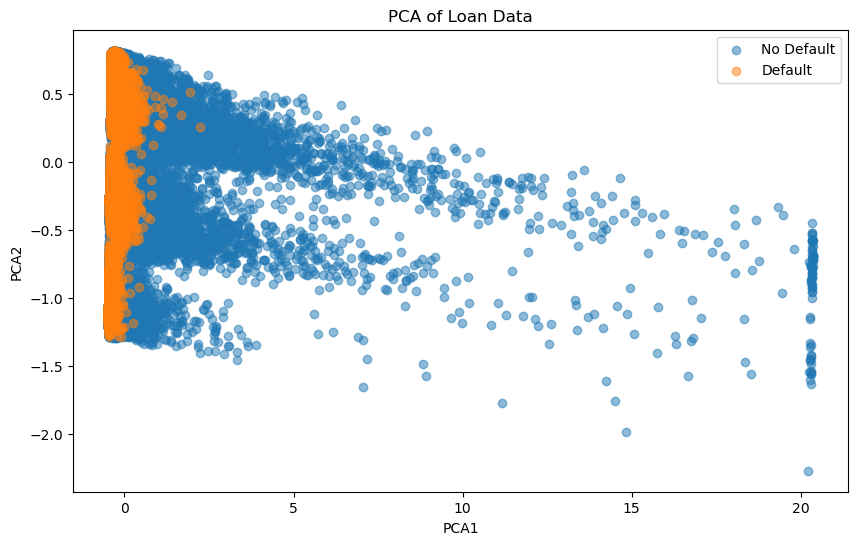

In [78]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded.drop(columns=["default"]))

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=["PCA1", "PCA2"])
pca_df["default"] = df_encoded["default"].values

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(
    pca_df[pca_df["default"] == 0]["PCA1"],
    pca_df[pca_df["default"] == 0]["PCA2"],
    label="No Default",
    alpha=0.5,
)
plt.scatter(
    pca_df[pca_df["default"] == 1]["PCA1"],
    pca_df[pca_df["default"] == 1]["PCA2"],
    label="Default",
    alpha=0.5,
)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA of Loan Data")
plt.legend()
plt.show()

In [10]:
pca_df.to_csv("PCA.csv", index=False)

In [11]:
import pickle

# Save the PCA model
with open("pca_model.pkl", "wb") as file:
    pickle.dump(pca, file)

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, n_jobs=-1, random_state=42)
tsne_result = tsne.fit_transform(df_encoded.drop(columns=["default"]))

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=["TSNE1", "TSNE2"])
tsne_df["default"] = df_encoded["default"].values

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(
    tsne_df[tsne_df["default"] == 0]["TSNE1"],
    tsne_df[tsne_df["default"] == 0]["TSNE2"],
    label="No Default",
    alpha=0.5,
)
plt.scatter(
    tsne_df[tsne_df["default"] == 1]["TSNE1"],
    tsne_df[tsne_df["default"] == 1]["TSNE2"],
    label="Default",
    alpha=0.5,
)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("t-SNE of Loan Data")
plt.legend()
plt.show()


In [15]:
tsne_df.to_csv("tsne.csv", index=False)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(df_encoded.drop(columns=["default"]), df_encoded["default"])

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame(
    {"Feature": df_encoded.drop(columns=["default"]).columns, "Importance": importances}
)

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Display the feature importances
print(feature_importances)

                 Feature  Importance
1               digital1    0.239589
2               digital2    0.239004
8          income_scaled    0.238901
3               digital3    0.236346
4                  sex_M    0.016636
0                married    0.013947
7  employment_unemployed    0.007234
6     employment_student    0.004279
5     employment_retired    0.004064


In [14]:
import umap.umap_ as umap

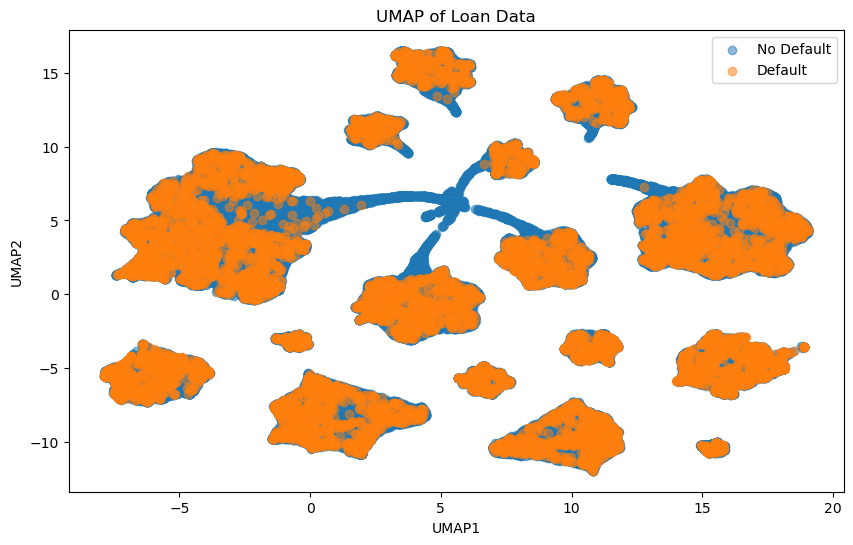

In [16]:
reducer = umap.UMAP(n_components=2)
umap_result = reducer.fit_transform(df_encoded.drop(columns=["default"]))

umap_df = pd.DataFrame(data=umap_result, columns=["UMAP1", "UMAP2"])
umap_df["default"] = df_encoded["default"].values

plt.figure(figsize=(10, 6))
plt.scatter(
    umap_df[umap_df["default"] == 0]["UMAP1"],
    umap_df[umap_df["default"] == 0]["UMAP2"],
    label="No Default",
    alpha=0.5,
)
plt.scatter(
    umap_df[umap_df["default"] == 1]["UMAP1"],
    umap_df[umap_df["default"] == 1]["UMAP2"],
    label="Default",
    alpha=0.5,
)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP of Loan Data")
plt.legend()
plt.show()


In [17]:
import seaborn as sns

# Display basic statistics
print("Basic Statistics:")
print(df.describe(include="all"))

Basic Statistics:
           sex employment       married          income       digital1  \
count   100000     100000  100000.00000   100000.000000  100000.000000   
unique       2          4           NaN             NaN            NaN   
top          M   employed           NaN             NaN            NaN   
freq     57331      57936           NaN             NaN            NaN   
mean       NaN        NaN       0.60822    18646.253910       0.417739   
std        NaN        NaN       0.48815    48178.198971       0.325269   
min        NaN        NaN       0.00000        0.000000       0.000000   
25%        NaN        NaN       0.00000     5385.000000       0.064623   
50%        NaN        NaN       1.00000     9370.000000       0.448209   
75%        NaN        NaN       1.00000    17474.250000       0.696019   
max        NaN        NaN       1.00000  1000000.000000       0.999975   

             digital2       digital3        default  
count   100000.000000  100000.000000  1

In [18]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sex           0
employment    0
married       0
income        0
digital1      0
digital2      0
digital3      0
default       0
dtype: int64


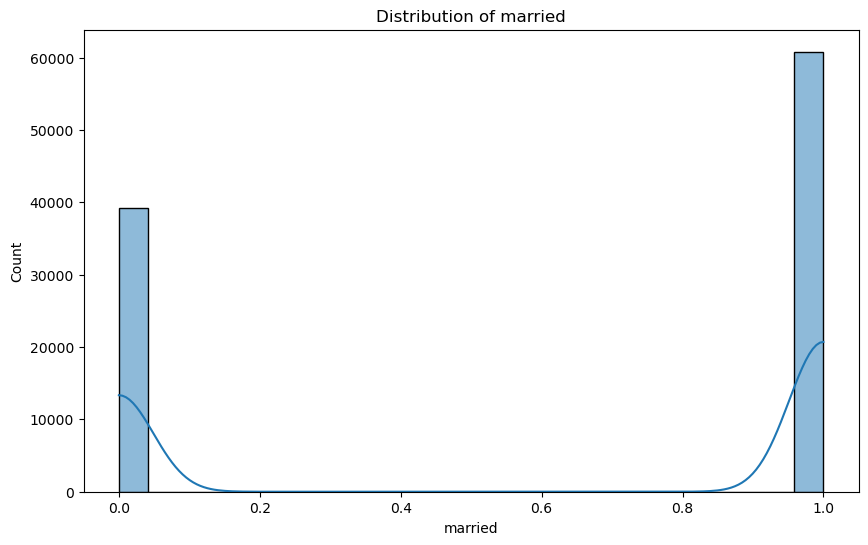

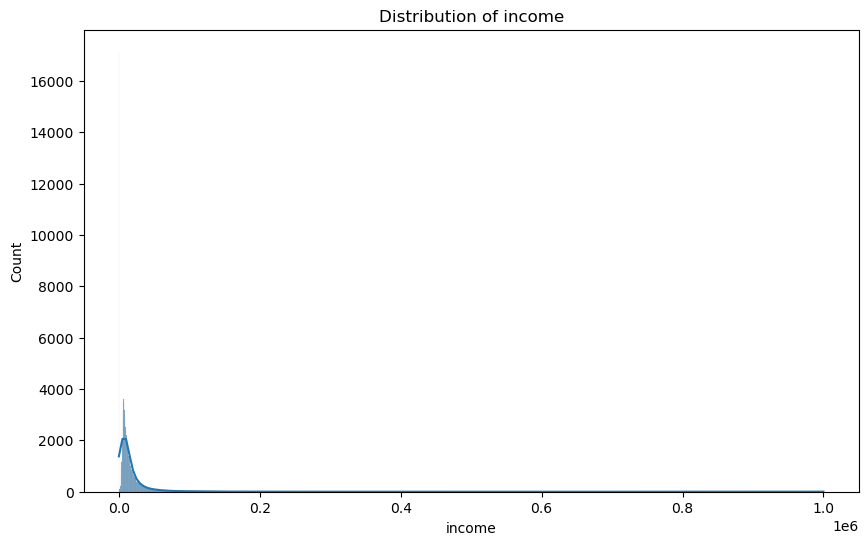

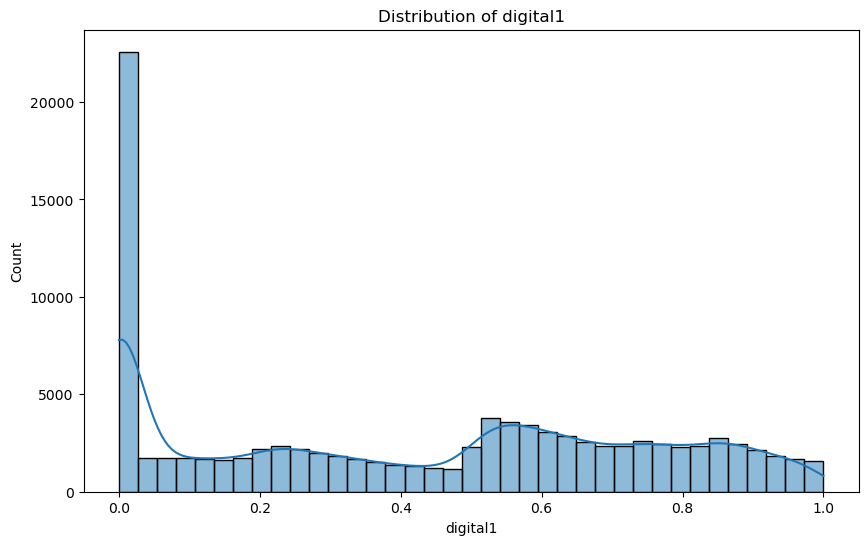

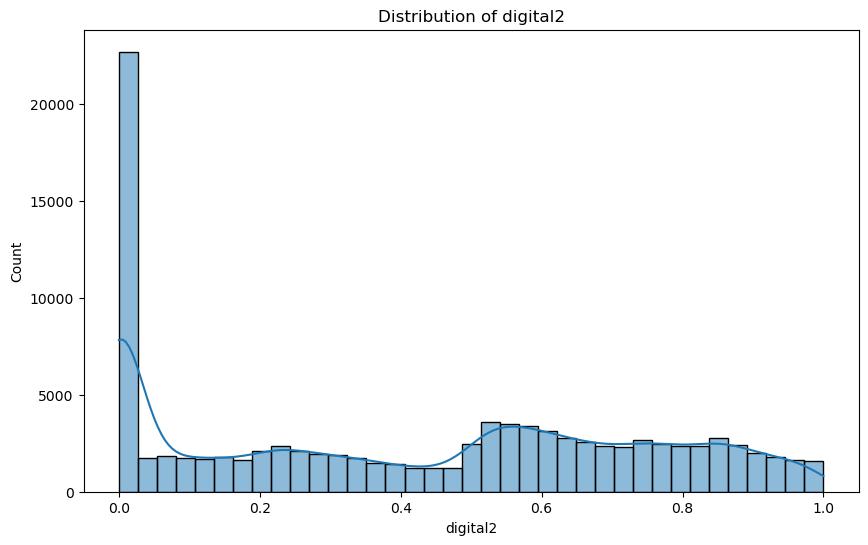

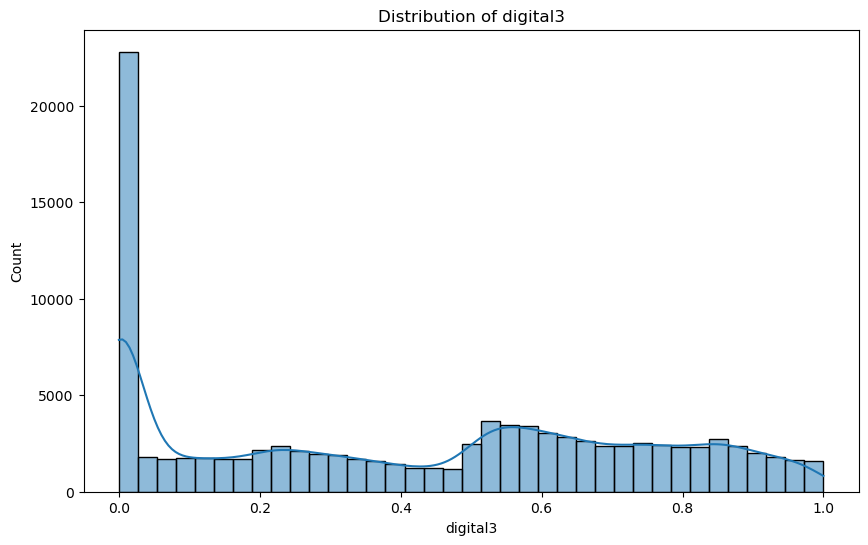

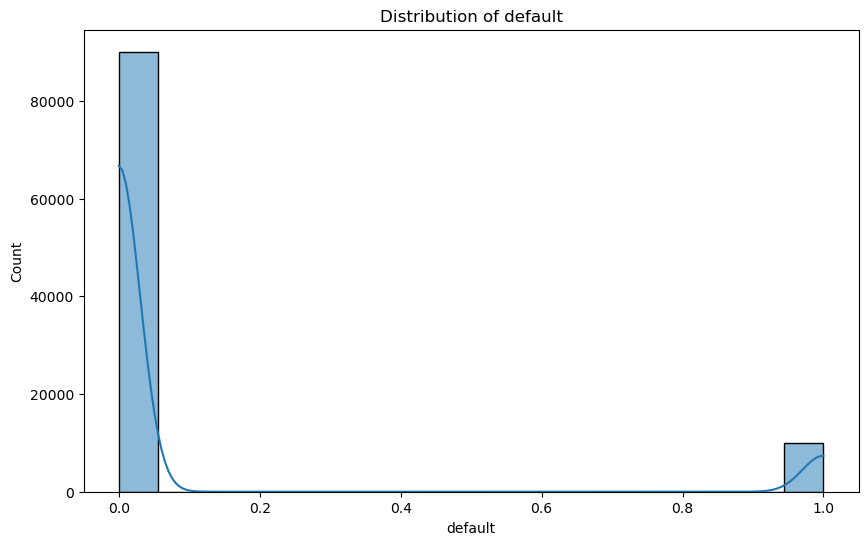

In [19]:
# Plot distributions of numerical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

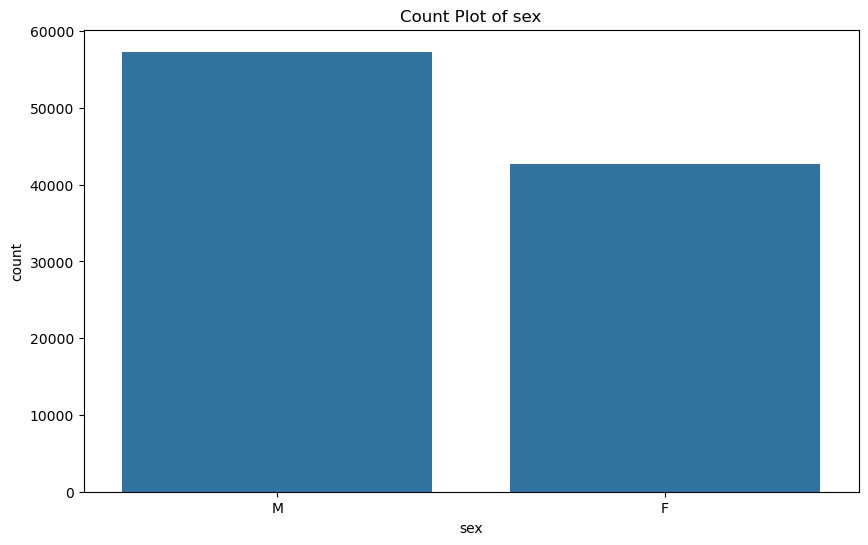

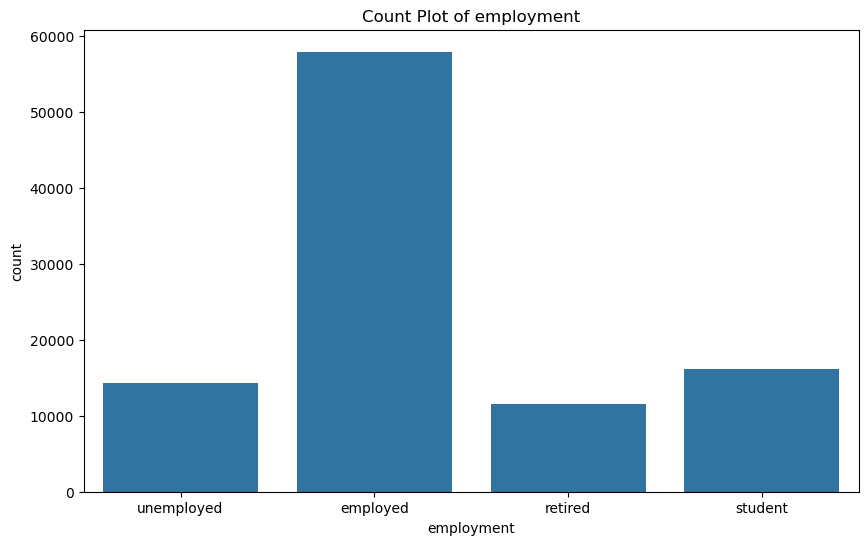

In [20]:
# Plot count plots of categorical features
categorical_features = df.select_dtypes(include=["object"]).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature])
    plt.title(f"Count Plot of {feature}")
    plt.show()


In [21]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


ValueError: could not convert string to float: 'M'

<Figure size 1200x800 with 0 Axes>

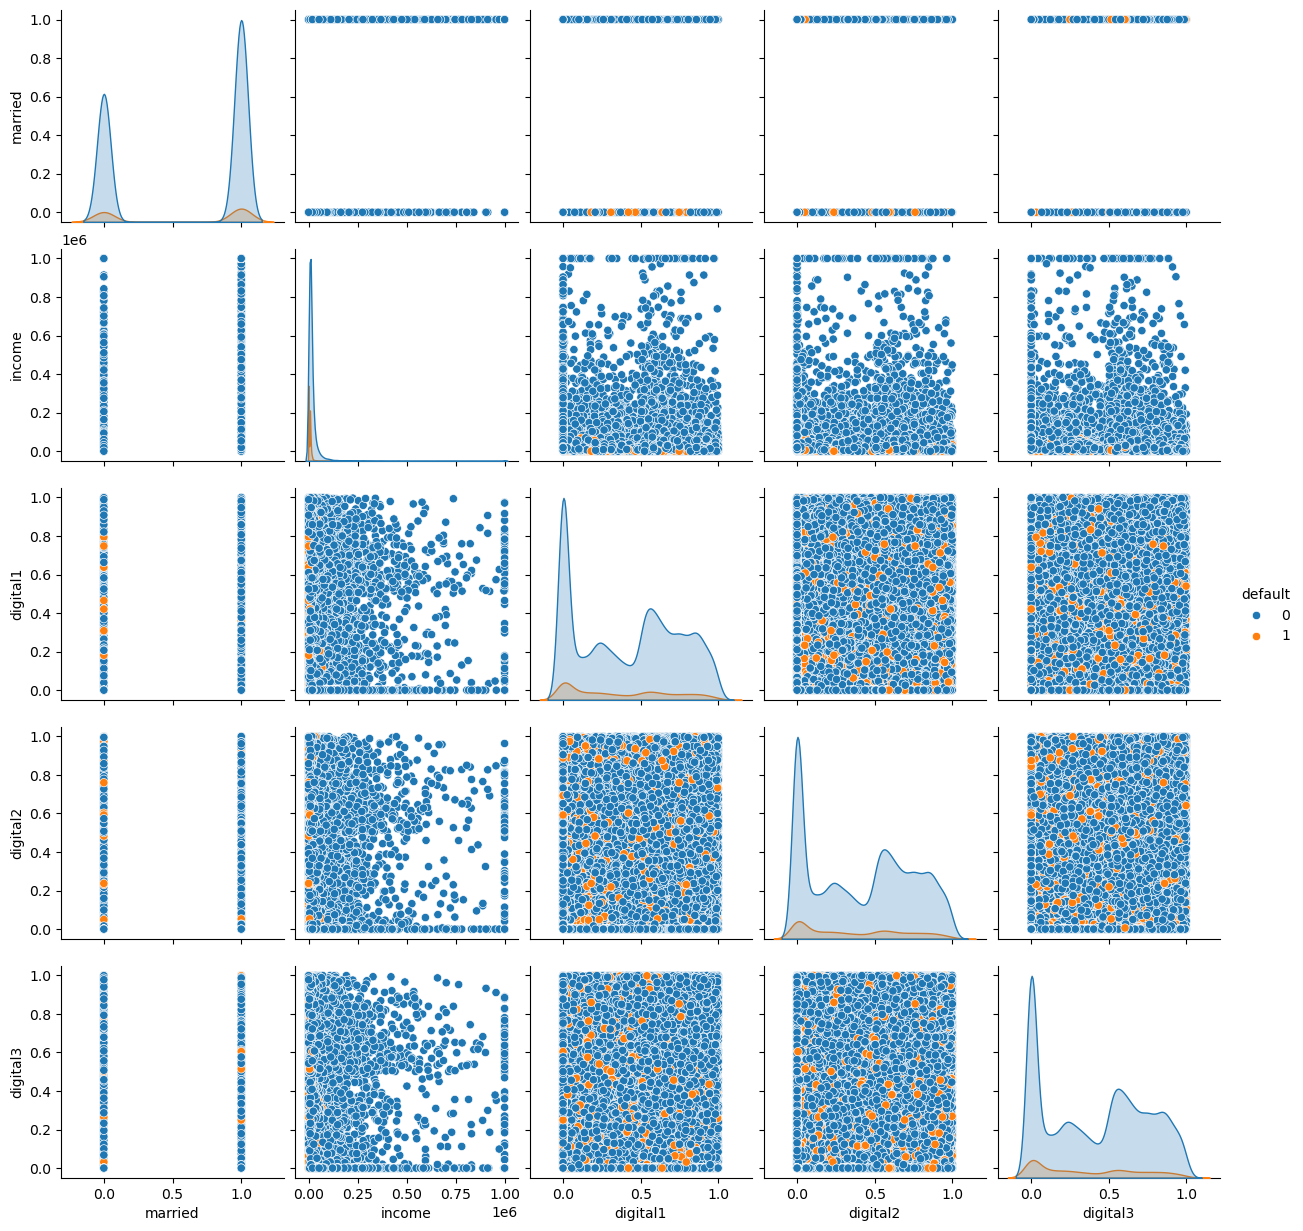

In [23]:
# Pairplot to see relationships between variables
sns.pairplot(df, hue="default", diag_kind="kde")
plt.show()


In [9]:
df_encoded.head()

,married,digital1,digital2,digital3,default,sex_M,employment_retired,employment_student,employment_unemployed,income_scaled
0,0,0.749267,0.422656,0.738735,0,True,False,False,True,-0.387029
1,1,0.697428,0.596361,0.733947,0,True,False,False,False,0.154879
2,1,0.000000,0.652496,0.000000,0,True,False,False,False,-0.141896
3,1,0.000000,0.000000,0.000000,0,True,False,False,True,-0.387029
4,1,0.000000,0.041123,0.203202,0,False,True,False,False,-0.256056


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
X = df_encoded.drop(columns=["default"])
y = df_encoded["default"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Balanced Accuracy: 0.507028949580866
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27016
           1       0.36      0.02      0.03      2984

    accuracy                           0.90     30000
   macro avg       0.63      0.51      0.49     30000
weighted avg       0.85      0.90      0.86     30000



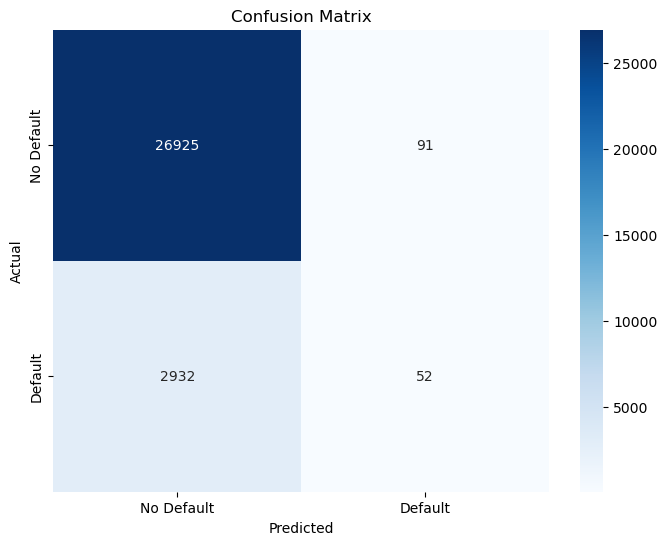

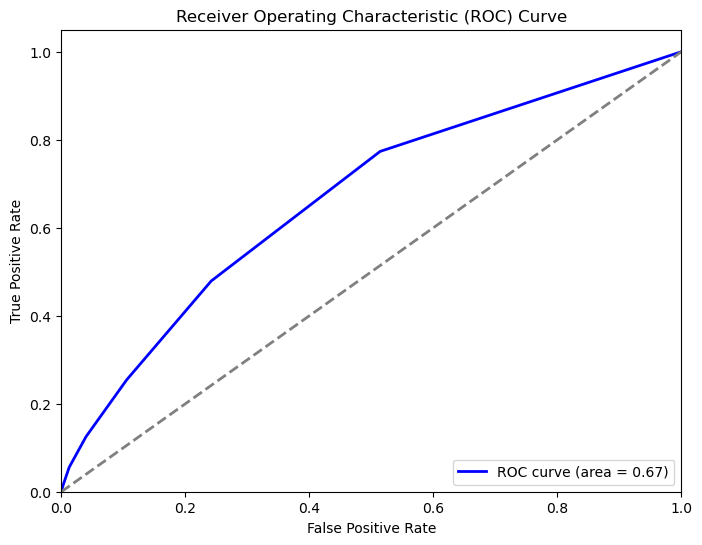

In [15]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Balanced Accuracy (MLP): 0.5048427265026544
Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27016
           1       0.62      0.01      0.02      2984

    accuracy                           0.90     30000
   macro avg       0.76      0.50      0.48     30000
weighted avg       0.87      0.90      0.86     30000



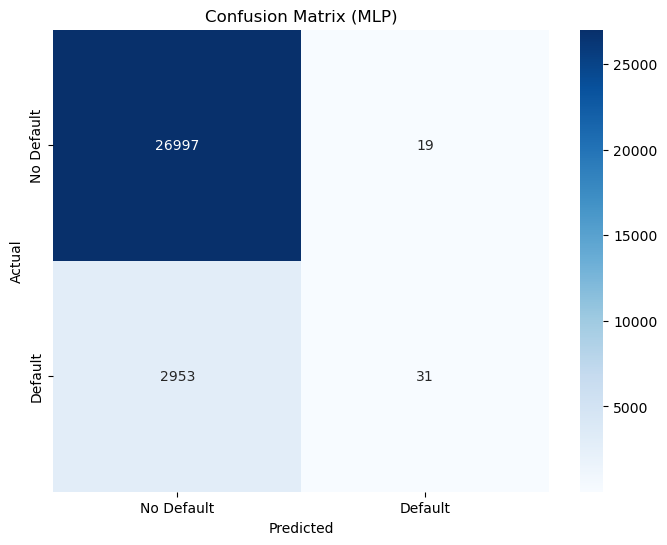

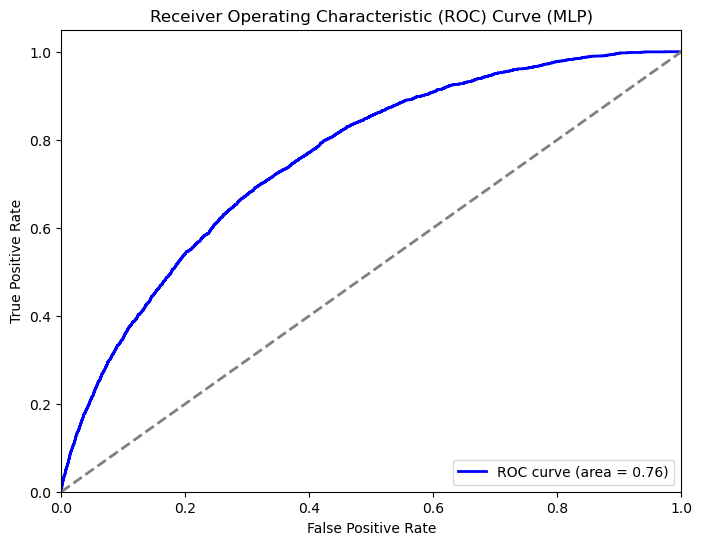

In [16]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Predict the test set
y_pred_mlp = mlp.predict(X_test)

# Calculate balanced accuracy
balanced_acc_mlp = balanced_accuracy_score(y_test, y_pred_mlp)
print(f"Balanced Accuracy (MLP): {balanced_acc_mlp}")

# Print classification report
print("Classification Report (MLP):")
print(classification_report(y_test, y_pred_mlp))

# Plot confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_mlp,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (MLP)")
plt.show()

# Plot ROC AUC
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_mlp, tpr_mlp, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_mlp:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (MLP)")
plt.legend(loc="lower right")
plt.show()

In [29]:
df_encoded["digital1_digital2"] = df_encoded["digital1"] * df_encoded["digital2"]
df_encoded["digital1_digital3"] = df_encoded["digital1"] * df_encoded["digital3"]
df_encoded["digital2_digital3"] = df_encoded["digital2"] * df_encoded["digital3"]


df_encoded["digital1_squared"] = df_encoded["digital1"] ** 2
df_encoded["digital2_squared"] = df_encoded["digital2"] ** 2
df_encoded["digital3_squared"] = df_encoded["digital3"]

df_encoded["digital1_digital_2_digital3"] = (
    df_encoded["digital1"] * df_encoded["digital2"] * df_encoded["digital3"]
)

df_encoded["average_digital"] = (
    df_encoded["digital1"] + df_encoded["digital2"] + df_encoded["digital3"]
) / 3

# Binning
df_encoded["income_bin"] = pd.cut(df_encoded["income_scaled"], bins=10, labels=False)

# Display the first few rows of the dataframe to verify the new features
df_encoded.head()


,married,digital1,digital2,digital3,default,sex_M,employment_retired,employment_student,employment_unemployed,income_scaled,digital1_digital2,digital1_digital3,digital2_digital3,digital1_squared,digital2_squared,digital3_squared,digital1_digital_2_digital3,average_digital,income_bin
0,0,0.749267,0.422656,0.738735,0,True,False,False,True,-0.387029,0.316682,0.553510,0.312231,0.561401,0.178638,0.738735,0.233944,0.636886,0
1,1,0.697428,0.596361,0.733947,0,True,False,False,False,0.154879,0.415919,0.511875,0.437697,0.486405,0.355647,0.733947,0.305262,0.675912,0
2,1,0.000000,0.652496,0.000000,0,True,False,False,False,-0.141896,0.000000,0.000000,0.000000,0.000000,0.425751,0.000000,0.000000,0.217499,0
3,1,0.000000,0.000000,0.000000,0,True,False,False,True,-0.387029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,1,0.000000,0.041123,0.203202,0,False,True,False,False,-0.256056,0.000000,0.000000,0.008356,0.000000,0.001691,0.203202,0.000000,0.081441,0


In [30]:
X = df_encoded.drop(columns=["default"])
y = df_encoded["default"]

In [31]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Balanced Accuracy: 0.5058005046756128
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27016
           1       0.32      0.02      0.03      2984

    accuracy                           0.90     30000
   macro avg       0.61      0.51      0.49     30000
weighted avg       0.84      0.90      0.86     30000



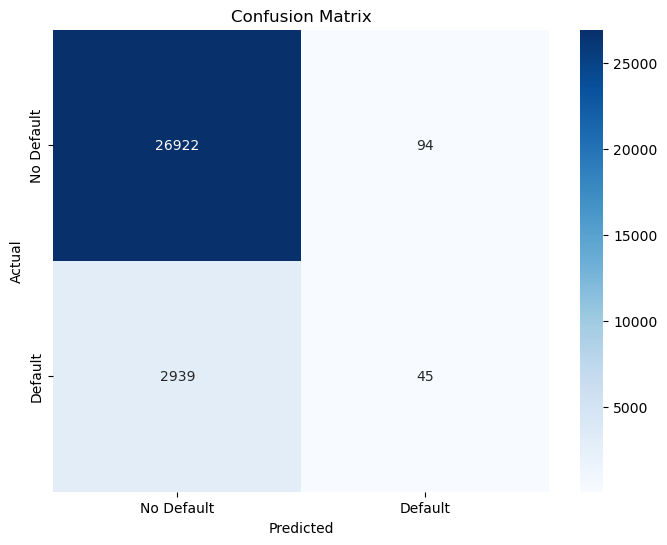

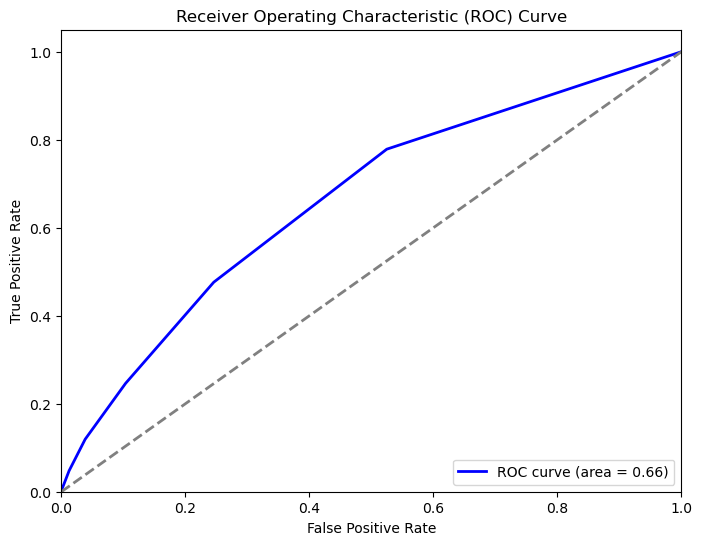

In [32]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Balanced Accuracy (Random Forest): 0.5176801196550391
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     27016
           1       0.33      0.05      0.08      2984

    accuracy                           0.90     30000
   macro avg       0.62      0.52      0.51     30000
weighted avg       0.85      0.90      0.86     30000



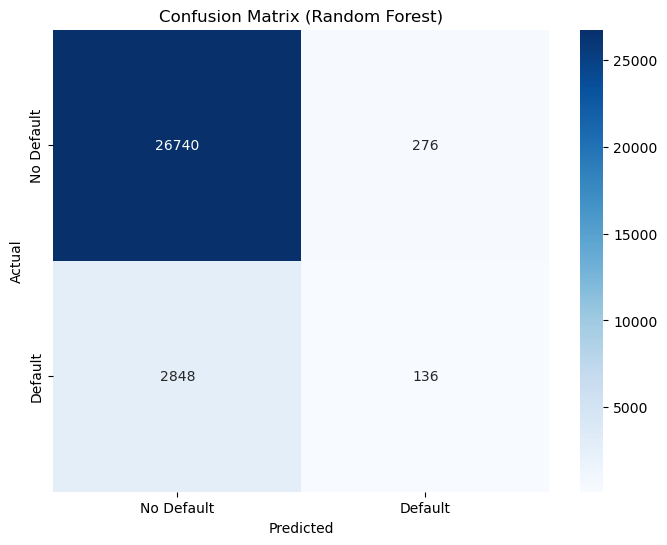

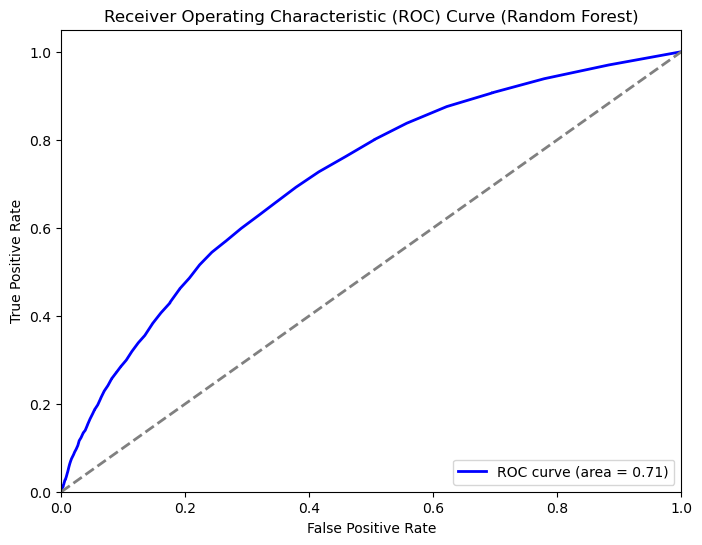

In [34]:
# random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict the test set
y_pred_rf = rf.predict(X_test)

# Calculate balanced accuracy
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
print(f"Balanced Accuracy (Random Forest): {balanced_acc_rf}")

# Print classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

# Plot ROC AUC
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_rf, tpr_rf, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_rf:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (Random Forest)")
plt.legend(loc="lower right")
plt.show()


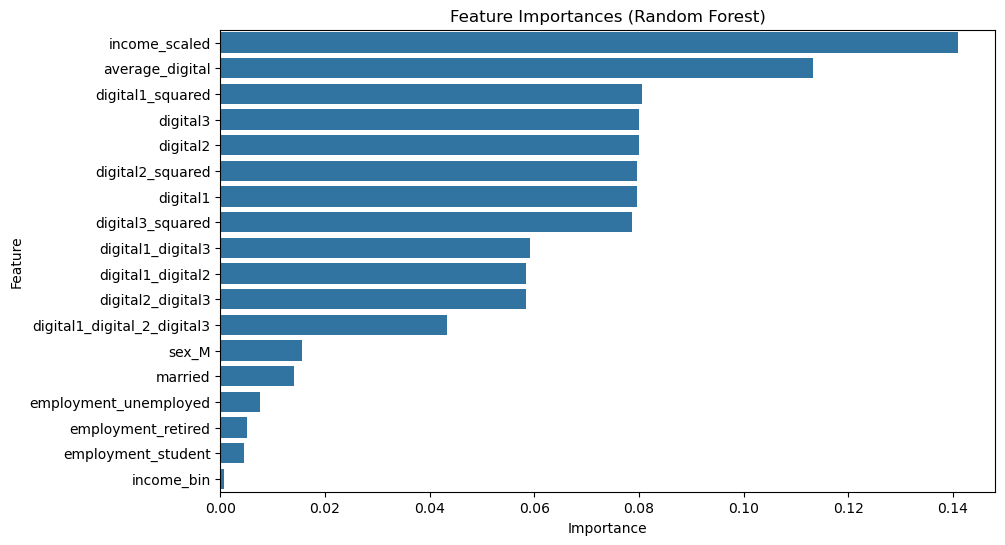

In [35]:
# Feature importance
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importances (Random Forest)")
plt.show()


In [79]:
import torch
import torch.nn as nn

In [80]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoder_dim):
        super(Autoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoder_dim),
            nn.Tanh(),
            nn.Linear(encoder_dim, encoder_dim // 2),
            nn.ReLU(),
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(encoder_dim // 2, encoder_dim // 2),
            nn.Tanh(),
            nn.Linear(encoder_dim // 2, input_dim),
            nn.ReLU(),
        )

    def forward(self, x):
        # Encoding
        encoded = self.encoder(x)
        # Decoding
        decoded = self.decoder(encoded)
        return decoded


In [81]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
import os


In [82]:
class Trainer:
    def __init__(
        self,
        model,
        train_data,
        test_data,
        epochs,
        batch_size,
        optimizer,
        loss_fn,
        eval_metric,
        model_save_dir,
    ):
        self.model = model
        self.train_data = train_data
        self.test_data = test_data
        self.epochs = epochs
        self.batch_size = batch_size
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.eval_metric = eval_metric
        self.model_save_dir = model_save_dir

        # Initialize TensorBoard writer
        self.writer = SummaryWriter(log_dir="./logs")

    def train_model(self):
        # Prepare data loaders
        train_loader = DataLoader(
            TensorDataset(self.train_data, self.train_data),
            batch_size=self.batch_size,
            shuffle=True,
        )
        test_loader = DataLoader(
            TensorDataset(self.test_data, self.test_data),
            batch_size=self.batch_size,
            shuffle=False,
        )

        best_loss = float("inf")

        for epoch in range(self.epochs):
            # Training phase
            self.model.train()
            train_loss = 0
            for batch_inputs, _ in train_loader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_inputs)
                loss = self.loss_fn(outputs, batch_inputs)
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item()

            avg_train_loss = train_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{self.epochs} - Train Loss: {avg_train_loss:.4f}")

            # Validation phase
            self.model.eval()
            val_loss = 0
            correct = 0
            total = 0
            with torch.no_grad():
                for batch_inputs, _ in test_loader:
                    outputs = self.model(batch_inputs)
                    loss = self.loss_fn(outputs, batch_inputs)
                    val_loss += loss.item()

                    # Evaluation metric (accuracy)
                    predicted = outputs.round()
                    correct += (predicted == batch_inputs).sum().item()
                    total += batch_inputs.numel()

            avg_val_loss = val_loss / len(test_loader)
            accuracy = correct / total
            print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.4f}")

            # Log to TensorBoard
            self.writer.add_scalar("Loss/train", avg_train_loss, epoch)
            self.writer.add_scalar("Loss/val", avg_val_loss, epoch)
            self.writer.add_scalar("Accuracy/val", accuracy, epoch)

            # Save the best model checkpoint
            if avg_val_loss < best_loss:
                best_loss = avg_val_loss
                torch.save(
                    self.model.state_dict(), f"{self.model_save_dir}/best_model.pth"
                )

        print("Training Done.")
        self.writer.close()

In [85]:
def get_train_and_test(data):
    X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
    X_train = X_train[X_train["default"] == 0]
    X_test = X_test[X_test["default"] == 0]
    y_train = X_train["default"]
    y_test = X_test["default"]
    X_train = X_train.drop(columns=["default"])
    X_test = X_test.drop(columns=["default"])
    X_train = X_train.astype(
        {
            "sex_M": "int",
            "employment_retired": "int",
            "employment_student": "int",
            "employment_unemployed": "int",
        }
    )
    X_test = X_test.astype(
        {
            "sex_M": "int",
            "employment_retired": "int",
            "employment_student": "int",
            "employment_unemployed": "int",
        }
    )

    X_train = torch.tensor(X_train.values).float()
    X_test = torch.tensor(X_test.values).float()

    return X_train, X_test, y_test

In [87]:
X_train, X_test, y_test = get_train_and_test(df_encoded)

In [68]:
# Define the training configuration parameters
EPOCHS = 100
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
MODEL_SAVE_DIR = "./models"
PLOTS_DIR = "./plots"


In [88]:
# Initialize the Autoencoder model
autoencoder = Autoencoder(input_dim=X_train.shape[1], encoder_dim=32)

In [89]:
# Loss function (MSE)
loss_fn = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(autoencoder.parameters(), lr=LEARNING_RATE)


In [92]:
trainer = Trainer(
    model=autoencoder,
    train_data=X_train,
    test_data=X_test,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    optimizer=optimizer,
    loss_fn=loss_fn,
    eval_metric=None,
    model_save_dir=MODEL_SAVE_DIR,
)


In [93]:
def plot_loss_curves(self):
    fig = plt.figure(num="Loss Curves")
    fig.set_size_inches(12, 6)
    plt.plot(self.history["loss"])
    plt.plot(self.history["val_loss"])
    plt.title("Loss By Epoch")
    plt.ylabel("Loss")
    plt.xlabel("Epoch Num")
    plt.legend(["Train_Data", "Test_Data"], loc="upper right")
    plt.grid(True, alpha=0.25)
    plt.tight_layout()
    image_name = "Loss_Curves.png"
    fig.savefig(os.path.join(PLOTS_DIR, image_name), dpi=fig.dpi)
    plt.clf()

In [95]:
# Train the model
trainer.train_model()

Epoch 1/100 - Train Loss: 0.1068
Validation Loss: 0.1031, Accuracy: 0.5308
Epoch 2/100 - Train Loss: 0.1016
Validation Loss: 0.1015, Accuracy: 0.5308
Epoch 3/100 - Train Loss: 0.1004
Validation Loss: 0.1006, Accuracy: 0.5309
Epoch 4/100 - Train Loss: 0.1003
Validation Loss: 0.1004, Accuracy: 0.5309
Epoch 5/100 - Train Loss: 0.1001
Validation Loss: 0.1008, Accuracy: 0.5309
Epoch 6/100 - Train Loss: 0.1001
Validation Loss: 0.1004, Accuracy: 0.5309
Epoch 7/100 - Train Loss: 0.1003
Validation Loss: 0.1003, Accuracy: 0.5309
Epoch 8/100 - Train Loss: 0.1000
Validation Loss: 0.1005, Accuracy: 0.5309
Epoch 9/100 - Train Loss: 0.1002
Validation Loss: 0.1003, Accuracy: 0.5309
Epoch 10/100 - Train Loss: 0.1001
Validation Loss: 0.1008, Accuracy: 0.5309
Epoch 11/100 - Train Loss: 0.1001
Validation Loss: 0.1002, Accuracy: 0.5309
Epoch 12/100 - Train Loss: 0.1000
Validation Loss: 0.1004, Accuracy: 0.5309
Epoch 13/100 - Train Loss: 0.1000
Validation Loss: 0.1003, Accuracy: 0.5309
Epoch 14/100 - Train 

KeyboardInterrupt: 